In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Recurrent Networks

Before we discuss recurrent networks, we need to introduce some simple building blocks.

### Delay Block

The first building block is the **delay block**, which is illustrated in Figure 11.

$$
\begin{aligned}
    \text{Delay} \quad & \quad u(t) \\
    & \quad \downarrow \\
    & \quad a(t) \\
    a(t) &= u(t - 1)
\end{aligned}
$$

The delay output $ a(t) $ is computed from its input $ u(t) $ according to:

$$
a(t) = u(t - 1) \tag{2.7}
$$

Thus, the output is the input delayed by one time step. This assumes that time is updated in discrete steps and takes on only integer values. Equation (2.7) requires that the output be initialized at time $ t = 0 $. This initial condition is indicated in Figure 2.11 by the arrow coming into the bottom of the delay block.

### Integrator Block

Another related building block, which we will use for the continuous-time recurrent networks in Chapters 18–21, is the **integrator**, which is shown in Figure 2.

$$
\begin{aligned}
    \text{Integrator} \quad & \quad u(t) \\
    & \quad \downarrow \\
    & \quad a(t) \\
    a(t) &= \int_0^t u(\tau) \, d\tau + a(0)
\end{aligned}
$$

The initial condition $ a(0) $ is indicated by the arrow coming into the bottom of the integrator block.

### Recurrent Networks

We are now ready to introduce **recurrent networks**. A recurrent network is a network with feedback; some of its outputs are connected to its inputs. This is quite different from the networks that we have studied thus far, which were strictly feedforward with no backward connections. 

One type of discrete-time recurrent network is shown in Figure 2.


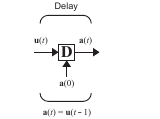

Figure 1. Delay Block


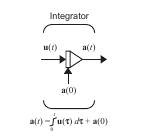

Figure 2. Integrator Block


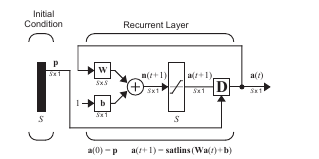

Figure 3. Recurrent Network

### Recurrent Networks

In this particular network, the vector $ p $ supplies the initial conditions (i.e., $ a(0) = p $). Then future outputs of the network are computed from previous outputs according to the following equations:

$$
\begin{aligned}
    a(1) &= \text{satlins}(W a(0) + b), \\
    a(2) &= \text{satlins}(W a(1) + b), \\
    &\vdots
\end{aligned}
$$

Recurrent networks are potentially more powerful than feedforward networks and can exhibit temporal behavior. These types of networks are discussed in Chapters 3, 14, and 18–21.


### Summary of Results

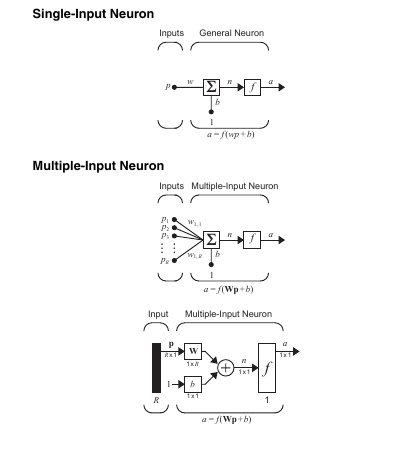


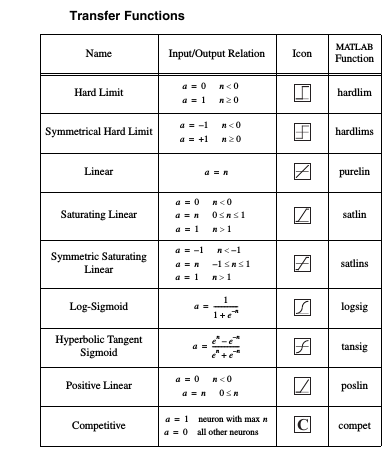


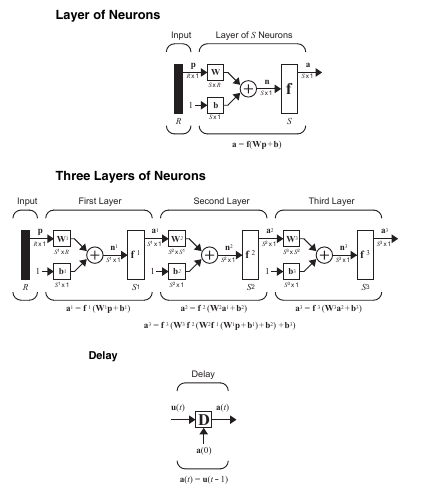

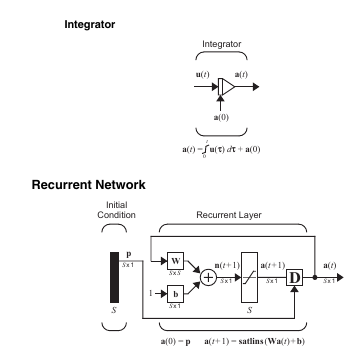

#### How to Pick an Architecture 

Problem specifications help define the network in the following ways: 1. Number of network inputs = number of problem inputs 2. Number of neurons in output layer = number of problem outputs 3. Output layer transfer function choice at least partly determined by problem specification of the outputs

In [1]:
import numpy as np

def satlins(x):
    """Saturating linear activation function."""
    return np.clip(x, 0, 1)

def recurrent_network(p, W, b, steps):
    """Compute outputs of a recurrent network.
    
    Args:
        p (np.ndarray): Initial condition (input vector).
        W (np.ndarray): Weight matrix for the connections.
        b (np.ndarray): Bias vector.
        steps (int): Number of time steps to compute.

    Returns:
        np.ndarray: Outputs of the network over time.
    """
    a = np.zeros(steps)  # Initialize output array
    a[0] = p  # Set initial condition

    for t in range(1, steps):
        a[t] = satlins(np.dot(W, a[t-1]) + b)  # Update the output using previous output

    return a

# Example parameters
p = np.array([0.5])      # Initial condition
W = np.array([[0.8]])    # Weight matrix
b = np.array([0.1])      # Bias
steps = 10               # Number of time steps

# Run the recurrent network
outputs = recurrent_network(p, W, b, steps)
print("Outputs of the recurrent network:")
print(outputs)


Outputs of the recurrent network:
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


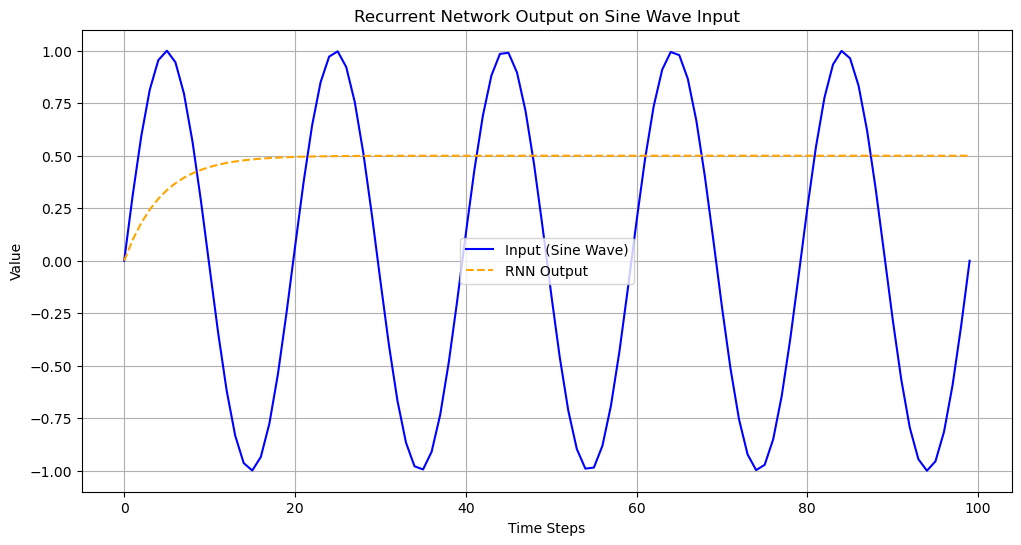

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def satlins(x):
    """Saturating linear activation function."""
    return np.clip(x, 0, 1)

def recurrent_network(p, W, b, steps):
    """Compute outputs of a recurrent network.
    
    Args:
        p (np.ndarray): Initial condition (input vector).
        W (np.ndarray): Weight matrix for the connections.
        b (np.ndarray): Bias vector.
        steps (int): Number of time steps to compute.

    Returns:
        np.ndarray: Outputs of the network over time.
    """
    a = np.zeros(steps)  # Initialize output array
    a[0] = p  # Set initial condition

    for t in range(1, steps):
        a[t] = satlins(np.dot(W, a[t-1]) + b)  # Update the output using previous output

    return a

# Generate a synthetic dataset (sine wave)
num_steps = 100
x = np.linspace(0, 10 * np.pi, num_steps)  # Time steps
inputs = np.sin(x)  # Sine wave values

# Set up parameters for the recurrent network
initial_condition = inputs[0]  # Start with the first value of the sine wave
W = np.array([[0.8]])  # Weight matrix
b = np.array([0.1])    # Bias
steps = num_steps      # Number of time steps to run the network

# Run the recurrent network for the entire input dataset
outputs = recurrent_network(initial_condition, W, b, steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(inputs, label='Input (Sine Wave)', color='blue')
plt.plot(outputs, label='RNN Output', color='orange', linestyle='--')
plt.title('Recurrent Network Output on Sine Wave Input')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


Problem Statement A produce dealer has a warehouse that stores a variety of fruits and vege- tables. When fruit is brought to the warehouse, various types of fruit may be mixed together. The dealer wants a machine that will sort the fruit ac- cording to type. There is a conveyer belt on which the fruit is loaded. This conveyer passes through a set of sensors, which measure three properties of the fruit: shape, texture and weight. These sensors are somewhat primi- tive. The shape sensor will output a 1 if the fruit is approximately round and a – 1 if it is more elliptical. The texture sensor will output a 1 if the sur- face of the fruit is smooth and a – 1 if it is rough. The weight sensor will output a 1 if the fruit is more than one pound and a – 1 if it is less than one pound. The three sensor outputs will then be input to a neural network. The pur- pose of the network is to decide which kind of fruit is on the conveyor, so that the fruit can be directed to the correct storage bin. To make the prob- lem even simpler, lets assume that there are only two kinds of fruit on the conveyor: apples and oranges.

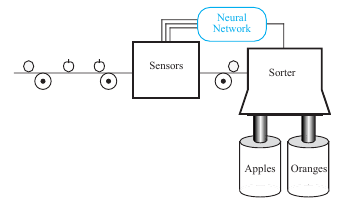
As each fruit passes through the sensors it can be represented by a three- dimensional vector. The first element of the vector will represent shape, the second element will represent texture and the third element will repre- sent weight:

## Pattern Recognition with Neural Networks

In this section, we define a simple problem of distinguishing between two fruits—an orange and an apple—based on texture and weight.

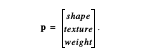

Therefore, a prototype orange would be represented by

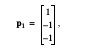

and a prototype apple would be represented by

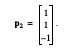

The neural network will receive one three-dimensional input vector for each fruit on the conveyer and must make a decision as to whether the fruit is an orange $ p_1 $ or an apple $ p_2 $ . Now that we have defined this simple (trivial?) pattern recognition problem, lets look briefly at three different neural networks that could be used to solve it. The simplicity of our problem will facilitate our understanding of the operation of the networks.

The input shape $ p $ can be described as:

$$
p = \text{texture} \cdot \text{weight}
$$

Therefore, a prototype orange would be represented by the vector:

$$
p_1 = 
\begin{pmatrix}
1 \\
-1 
\end{pmatrix}
$$

And a prototype apple would be represented by the vector:

$$
p_2 = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
$$

### Neural Network Input

The neural network will receive one three-dimensional input vector for each fruit on the conveyer and must decide whether the fruit is an orange $( p_1 $) or an apple $( p_2 $).

Now that we have defined this simple (trivial) pattern recognition problem, let's look briefly at three different neural networks that could be used to solve it.

The simplicity of our problem will facilitate our understanding of the operation of the networks.

Perceptron The first network we will discuss is the perceptron. Figure 3.1 illustrates a single-layer perceptron with a symmetric hard limit transfer function hard- lims.

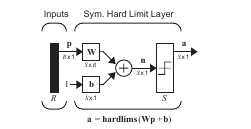
Figure 1 Single-Layer Perceptron



In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Set random seed for reproducibility
np.random.seed(42)

# Create a simple synthetic dataset
# Features: [texture, weight], Labels: [0: Apple, 1: Orange]
data = np.array([[1, -1], [1, 1], [-1, 1], [-1, -1]])
labels = np.array([0, 1, 0, 1])  # 0: Apple, 1: Orange

# Repeat data to increase the dataset size
data = np.repeat(data, 100, axis=0)
labels = np.repeat(labels, 100, axis=0)

# Add noise to the data
noise = np.random.normal(0, 0.1, data.shape)
data += noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Reshape input data for RNN [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build a simple RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(1, 2), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Show the plots
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


2024-09-27 22:46:43.648210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 22:46:48.311108: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-27 22:46:48.311144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-09-27 22:46:48.873784: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 22:47:00.028071: W tensorflow/stream_executor/platform/de

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

Epoch 0, Loss: [[0.12267649]]
Epoch 100, Loss: [[2.05469963e-05]]
Epoch 200, Loss: [[5.2446695e-06]]
Epoch 300, Loss: [[2.33541683e-06]]
Epoch 400, Loss: [[1.31444044e-06]]
Epoch 500, Loss: [[8.41937163e-07]]
Epoch 600, Loss: [[5.85401043e-07]]
Epoch 700, Loss: [[4.30777096e-07]]
Epoch 800, Loss: [[3.3043392e-07]]
Epoch 900, Loss: [[2.61631021e-07]]


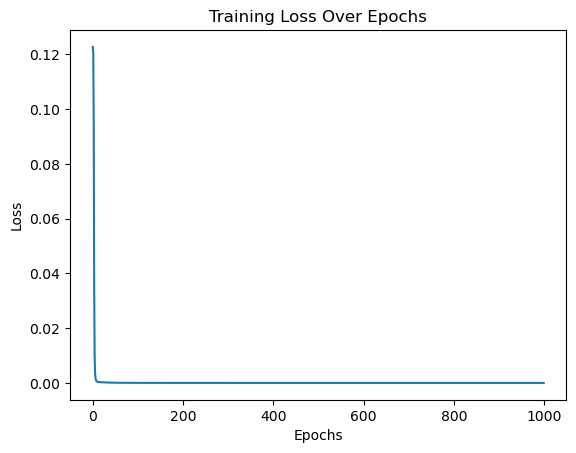

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Synthetic dataset creation (apple = [1, -1], orange = [-1, 1])
def create_dataset():
    # Features: [texture, weight], Labels: 0: Apple, 1: Orange
    data = np.array([[1, -1], [-1, 1]], dtype=np.float64)  # Ensure data is float
    labels = np.array([0, 1], dtype=np.float64)  # Labels should also be floats
    # Expand dataset by repeating values and adding noise
    data = np.repeat(data, 100, axis=0)
    labels = np.repeat(labels, 100)
    noise = np.random.normal(0, 0.1, data.shape)
    data += noise
    return data, labels

# RNN class definition
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases as float64
        self.Wxh = np.random.randn(self.hidden_size, self.input_size).astype(np.float64) * 0.01  # Input to hidden
        self.Whh = np.random.randn(self.hidden_size, self.hidden_size).astype(np.float64) * 0.01  # Hidden to hidden
        self.Why = np.random.randn(self.output_size, self.hidden_size).astype(np.float64) * 0.01  # Hidden to output
        self.bh = np.zeros((self.hidden_size, 1), dtype=np.float64)  # Hidden bias
        self.by = np.zeros((self.output_size, 1), dtype=np.float64)  # Output bias

    # Forward propagation
    def forward(self, x, h_prev):
        self.h = np.tanh(np.dot(self.Wxh, x) + np.dot(self.Whh, h_prev) + self.bh)  # Hidden state
        self.y = sigmoid(np.dot(self.Why, self.h) + self.by)  # Output
        return self.y, self.h

    # Backward propagation (BPTT)
    def backward(self, x, h_prev, y_true, output, dh_next):
        # Output layer error
        dy = output - y_true
        dWhy = np.dot(dy, self.h.T)
        dby = dy

        # Hidden layer error
        dh = np.dot(self.Why.T, dy) + dh_next
        dh_raw = (1 - self.h ** 2) * dh  # Derivative of tanh
        dWxh = np.dot(dh_raw, x.T)
        dWhh = np.dot(dh_raw, h_prev.T)
        dbh = dh_raw

        # Update weights and biases
        self.Wxh -= self.learning_rate * dWxh
        self.Whh -= self.learning_rate * dWhh
        self.Why -= self.learning_rate * dWhy
        self.bh -= self.learning_rate * dbh
        self.by -= self.learning_rate * dby

        return dh_raw

    # Train function
    def train(self, data, labels, epochs=1000):
        loss_history = []
        for epoch in range(epochs):
            h_prev = np.zeros((self.hidden_size, 1), dtype=np.float64)  # Initial hidden state
            total_loss = 0
            for i in range(len(data)):
                x = data[i].reshape(-1, 1)  # Input shape: (input_size, 1)
                y_true = np.array([[labels[i]]], dtype=np.float64)  # True label shape: (output_size, 1)

                # Forward pass
                output, h_prev = self.forward(x, h_prev)

                # Loss (Mean Squared Error)
                loss = 0.5 * (output - y_true) ** 2
                total_loss += loss

                # Backward pass
                dh_next = np.zeros_like(h_prev, dtype=np.float64)
                self.backward(x, h_prev, y_true, output, dh_next)

            # Store loss after each epoch as a scalar
            loss_history.append((total_loss / len(data)).item())

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {total_loss / len(data)}')

        return loss_history

# Generate dataset
data, labels = create_dataset()

# Initialize RNN with 2 inputs, 5 hidden units, and 1 output
rnn = SimpleRNN(input_size=2, hidden_size=5, output_size=1, learning_rate=0.01)

# Train the RNN and store loss history
loss_history = rnn.train(data, labels, epochs=1000)

# Plot the training loss over epochs
plt.plot(loss_history)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Two-Input Case Before we use the perceptron to solve the orange and apple recognition problem (which will require a three-input perceptron, i.e., R = 3 ), it is use- ful to investigate the capabilities of a two-input/single-neuron perceptron ( R = 2 ), which can be easily analyzed graphically. The two-input percep- tron is shown in Figure 2.

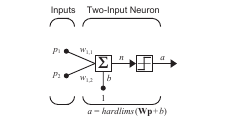
Figure 2. Two-Input/Single-Neuron Perceptron
Single-neuron perceptrons can classify input vectors into two categories. For example, for a two-input perceptron, if w 1 1 = – 1 and w 1 2 = 1 then


Therefore, if the inner product of the weight matrix (a single row vector in this case) with the input vector is greater than or equal to – b , the output will be 1. If the inner product of the weight vector and the input is less than – b , the output will be – 1 . This divides the input space into two parts. Fig- ure 3.3 illustrates this for the case where b = – 1 . The blue line in the fig- ure represents all points for which the net input n is equal to 0:



Notice that this decision boundary will always be orthogonal to the weight matrix, and the position of the boundary can be shifted by changing b . (In the general case, W is a matrix consisting of a number of row vectors, each of which will be used in an equation like Eq. (3.5). There will be one bound- ary for each row of W . See Chapter 4 for more on this topic.) The shaded region contains all input vectors for which the output of the network will be 1. The output will be – 1 for all other input vectors.

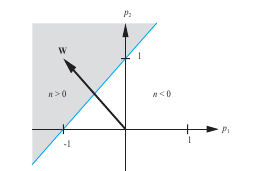

Figure 3. Perceptron Decision Boundary

The key property of the single-neuron perceptron, therefore, is that it can separate input vectors into two categories. The decision boundary between the categories is determined by the equation



Because the boundary must be linear, the single-layer perceptron can only be used to recognize patterns that are linearly separable (can be separated by a linear boundary). These concepts will be discussed in more detail in Chapter 4.

## Two-Input Perceptron Model

We are solving a binary classification problem using a two-input perceptron. The perceptron is defined by its weights $ W $, bias $ b $, and the hard limit activation function.

### Perceptron Equation

The perceptron computes the net input $ n $ as:

$$
n = W \cdot p + b
$$

Where:
- $ W = [w_{1,1}, w_{1,2}] $ is the weight vector.
- $ p = [p_1, p_2]^T $ is the input vector.
- $ b $ is the bias term.

The output $ a $ is calculated by applying the hard limit activation function:

$$
a = \text{hardlims}(n)
$$

The hard limit function is defined as:

$$
\text{hardlims}(n) =
\begin{cases}
1 & \text{if } n \geq 0 \\
-1 & \text{if } n < 0
\end{cases}
$$

## Training the Perceptron

During training, the perceptron adjusts its weights and bias based on the error between the predicted output $ a $ and the true label $ t $:

$$
\Delta W = \eta \cdot (t - a) \cdot p
$$

$$
\Delta b = \eta \cdot (t - a)
$$

Where $ \eta $ is the learning rate.

## Decision Boundary

The decision boundary for a two-input perceptron is determined by the equation:

$$
n = W \cdot p + b = 0
$$

This forms a line in the input space that separates the two classes.

## Example: Classifying Apples and Oranges

We can apply the perceptron model to classify apples and oranges. For instance, if:

- $ p_1 = $ texture
- $ p_2 = $ weight

We can define a perceptron with weights and bias that can classify between these two categories.


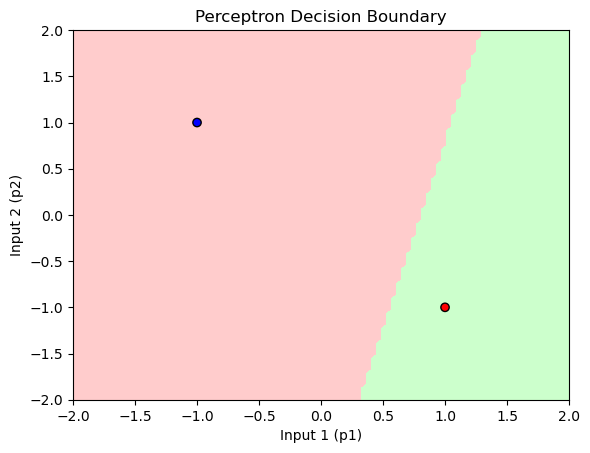

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Hard limit function
def hardlims(n):
    return np.where(n >= 0, 1, -1)

# Perceptron class
class Perceptron:
    def __init__(self, input_size):
        # Initialize weights and bias for two inputs
        self.W = np.random.randn(input_size)  # Randomly initialize weights
        self.b = np.random.randn()            # Randomly initialize bias

    # Forward pass: calculate the net input and apply the hard limit function
    def forward(self, p):
        n = np.dot(self.W, p) + self.b
        return hardlims(n)

    # Train the perceptron using simple rule
    def train(self, data, labels, epochs=100, lr=0.1):
        for _ in range(epochs):
            for i in range(len(data)):
                p = data[i]
                a = self.forward(p)
                error = labels[i] - a
                # Update rule: W_new = W_old + learning_rate * error * input
                self.W += lr * error * p
                self.b += lr * error

# Plot decision boundary
def plot_decision_boundary(perceptron, data, labels):
    # Create a grid of points in input space
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Classify each point in the grid
    Z = np.array([perceptron.forward(np.array([x, y])) for x, y in zip(np.ravel(xx), np.ravel(yy))])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['#ffcccc', '#ccffcc'])
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', edgecolors='k')
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Input 1 (p1)')
    plt.ylabel('Input 2 (p2)')
    plt.show()

# Create dataset for apples and oranges
def create_dataset():
    data = np.array([[1, -1], [-1, 1]])  # Apples and Oranges
    labels = np.array([1, -1])           # 1 for apple, -1 for orange
    return data, labels

# Initialize and train perceptron
data, labels = create_dataset()
perceptron = Perceptron(input_size=2)
perceptron.train(data, labels, epochs=10, lr=0.1)

# Plot the decision boundary
plot_decision_boundary(perceptron, data, labels)
